In [ ]:
# 환경 세팅
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### 파일 불러오기

In [2]:
# 각 폴더명 딕셔너리
folder_name = {1:"1.회원정보", 2:"2.신용정보", 3:"3.승인매출정보", 4:"4.청구입금정보", 5:"5.잔액정보", 6:"6.채널정보", 7:"7.마케팅정보", 8:"8.성과정보"}

# 현재 디렉터리
HOME = os.getcwd()

# 폴더 리스트를 생성하고 폴더 경로들을 리스트로 저장하기
folder_list = []
for value in folder_name.values():
    folder_list.append(os.path.join(HOME, "data", "train", value))
print(len(folder_list))

# 폴더 내 파일 리스트 읽어오기
fileNameList = {}
for i in range(len(folder_list)):
    fileNameList[i+1] = os.listdir(folder_list[i])
print(fileNameList)

# 파일 경로 리스트 생성
filePathList = {}
temp = []
for i in range(len(folder_list)):
    for j in range(len(fileNameList[i+1])):
        temp.append(os.path.join(folder_list[i], fileNameList[i+1][j]))
    filePathList[i+1] = temp
    temp = []

print(filePathList)

8
{1: ['201807_train_회원정보.parquet', '201808_train_회원정보.parquet', '201809_train_회원정보.parquet', '201810_train_회원정보.parquet', '201811_train_회원정보.parquet', '201812_train_회원정보.parquet'], 2: ['201807_train_신용정보.parquet', '201808_train_신용정보.parquet', '201809_train_신용정보.parquet', '201810_train_신용정보.parquet', '201811_train_신용정보.parquet', '201812_train_신용정보.parquet'], 3: ['201807_train_승인매출정보.parquet', '201808_train_승인매출정보.parquet', '201809_train_승인매출정보.parquet', '201810_train_승인매출정보.parquet', '201811_train_승인매출정보.parquet', '201812_train_승인매출정보.parquet'], 4: ['201807_train_청구정보.parquet', '201808_train_청구정보.parquet', '201809_train_청구정보.parquet', '201810_train_청구정보.parquet', '201811_train_청구정보.parquet', '201812_train_청구정보.parquet'], 5: ['201807_train_잔액정보.parquet', '201808_train_잔액정보.parquet', '201809_train_잔액정보.parquet', '201810_train_잔액정보.parquet', '201811_train_잔액정보.parquet', '201812_train_잔액정보.parquet'], 6: ['201807_train_채널정보.parquet', '201808_train_채널정보.parquet', '201809_train_채널정보.parquet',

In [3]:
# 파일 딕셔너리 생성
train_List = {}
temp = []
i = 0
# 파일 리스트에 각 파일의 데이터 프레임 저장
for files in filePathList.values():
    for file in files:
        temp.append(pd.read_parquet(file, engine='fastparquet'))
    i = i+1
    train_List[i] = temp
    temp = []

#### 같은 방식으로 테스트 데이터도 만들 수 있다.

### 파일 딕셔너리를 생성했으며, 이 파일 딕셔너리에는 모든 파일의 리스트가 담겨있다.

- 데이터 프레임을 불러올 때 형식
    - **df_List[i][j]**
    - i : 폴더의 번호
    - j : 파일의 번호. (201807 : 0, 201812 : 6)
- **주의 사항 : 메모리가 작을시 시도해선 안됨**

In [4]:
# 각 폴더명 딕셔너리
folder_name = {1:"1.회원정보", 2:"2.신용정보", 3:"3.승인매출정보", 4:"4.청구입금정보", 5:"5.잔액정보", 6:"6.채널정보", 7:"7.마케팅정보", 8:"8.성과정보"}

# 현재 디렉터리
HOME = os.getcwd()

# 폴더 리스트를 생성하고 폴더 경로들을 리스트로 저장하기
folder_list = []
for value in folder_name.values():
    folder_list.append(os.path.join(HOME, "data", "test", value))
print(len(folder_list))

# 폴더 내 파일 리스트 읽어오기
fileNameList = {}
for i in range(len(folder_list)):
    fileNameList[i+1] = os.listdir(folder_list[i])
print(fileNameList)

# 파일 경로 리스트 생성
filePathList = {}
temp = []
for i in range(len(folder_list)):
    for j in range(len(fileNameList[i+1])):
        temp.append(os.path.join(folder_list[i], fileNameList[i+1][j]))
    filePathList[i+1] = temp
    temp = []

print(filePathList)

8
{1: ['201807_test_회원정보.parquet', '201808_test_회원정보.parquet', '201809_test_회원정보.parquet', '201810_test_회원정보.parquet', '201811_test_회원정보.parquet', '201812_test_회원정보.parquet'], 2: ['201807_test_신용정보.parquet', '201808_test_신용정보.parquet', '201809_test_신용정보.parquet', '201810_test_신용정보.parquet', '201811_test_신용정보.parquet', '201812_test_신용정보.parquet'], 3: ['201807_test_승인매출정보.parquet', '201808_test_승인매출정보.parquet', '201809_test_승인매출정보.parquet', '201810_test_승인매출정보.parquet', '201811_test_승인매출정보.parquet', '201812_test_승인매출정보.parquet'], 4: ['201807_test_청구정보.parquet', '201808_test_청구정보.parquet', '201809_test_청구정보.parquet', '201810_test_청구정보.parquet', '201811_test_청구정보.parquet', '201812_test_청구정보.parquet'], 5: ['201807_test_잔액정보.parquet', '201808_test_잔액정보.parquet', '201809_test_잔액정보.parquet', '201810_test_잔액정보.parquet', '201811_test_잔액정보.parquet', '201812_test_잔액정보.parquet'], 6: ['201807_test_채널정보.parquet', '201808_test_채널정보.parquet', '201809_test_채널정보.parquet', '201810_test_채널정보.parquet', '201

In [ ]:
# 파일 딕셔너리 생성
test_List = {}
temp = []
i = 0
# 파일 리스트에 각 파일의 데이터 프레임 저장
for files in filePathList.values():
    for file in files:
        temp.append(pd.read_parquet(file, engine='fastparquet'))
    i = i+1
    test_List[i] = temp
    temp = []

In [5]:
train_List[1][0].head()

,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201807,TRAIN_000000,2,40대,D,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),22
1,201807,TRAIN_000001,1,30대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),18
2,201807,TRAIN_000002,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,20
3,201807,TRAIN_000003,2,40대,D,1,1,0,1,2,...,0,0,0,0개,0개,0개,0개,1,자녀성장(2),17
4,201807,TRAIN_000004,2,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,1,자녀성장(1),15


### Segment끼리의 비교

In [145]:
test_List[1][0].head()

NameError: name 'test_List' is not defined

- Segment가 있는 항목은 1번 폴더 뿐이므로, 1번 폴더끼리 비교해서 Segment의 변경이 있는지 확인한다.

In [ ]:
for i in range(5):
    display(train_List[1][0].compare(train_List[1][i+1]).head())

기준년월         회원여부_이용가능       회원여부_이용가능_CA       회원여부_이용가능_카드론        \
     self   other      self other         self other          self other   
0  201807  201808       NaN   NaN          NaN   NaN           NaN   NaN   
1  201807  201808       NaN   NaN          NaN   NaN           NaN   NaN   
2  201807  201808       NaN   NaN          NaN   NaN           NaN   NaN   
3  201807  201808       NaN   NaN          NaN   NaN           NaN   NaN   
4  201807  201808       NaN   NaN          NaN   NaN           NaN   NaN   

  소지여부_신용        ... 청구금액_기본연회비_B0M       청구금액_제휴연회비_B0M       카드신청건수        \
     self other  ...           self other           self other   self other   
0     NaN   NaN  ...            NaN   NaN            NaN   NaN    NaN   NaN   
1     NaN   NaN  ...            NaN   NaN            NaN   NaN    NaN   NaN   
2     NaN   NaN  ...            NaN   NaN            NaN   NaN    NaN   NaN   
3     NaN   NaN  ...            NaN   NaN            NaN   NaN    NaN   NaN   
4     NaN   NaN  ...            NaN   NaN            NaN   NaN    NaN   NaN   

  Life_Stage       최종카드발급경과월        
        self other      self other  
0        NaN   NaN      22.0  23.0  
1        NaN   NaN      18.0  19.0  
2        NaN   NaN      20.0  21.0  
3        NaN   NaN      17.0  18.0  
4        NaN   NaN      15.0  16.0  

[5 rows x 128 columns]

기준년월         회원여부_이용가능       회원여부_이용가능_CA       회원여부_이용가능_카드론        \
     self   other      self other         self other          self other   
0  201807  201809       NaN   NaN          NaN   NaN           NaN   NaN   
1  201807  201809       NaN   NaN          NaN   NaN           NaN   NaN   
2  201807  201809       NaN   NaN          NaN   NaN           NaN   NaN   
3  201807  201809       NaN   NaN          NaN   NaN           NaN   NaN   
4  201807  201809       NaN   NaN          NaN   NaN           NaN   NaN   

  소지여부_신용        ... 청구금액_기본연회비_B0M       청구금액_제휴연회비_B0M       카드신청건수        \
     self other  ...           self other           self other   self other   
0     NaN   NaN  ...            NaN   NaN            NaN   NaN    NaN   NaN   
1     NaN   NaN  ...            NaN   NaN            NaN   NaN    NaN   NaN   
2     NaN   NaN  ...            NaN   NaN            NaN   NaN    NaN   NaN   
3     NaN   NaN  ...            NaN   NaN            NaN   NaN    NaN   NaN   
4     NaN   NaN  ...            NaN   NaN            NaN   NaN    1.0   0.0   

  Life_Stage       최종카드발급경과월        
        self other      self other  
0        NaN   NaN      22.0  24.0  
1        NaN   NaN      18.0  20.0  
2        NaN   NaN      20.0  22.0  
3        NaN   NaN      17.0  19.0  
4        NaN   NaN      15.0  17.0  

[5 rows x 128 columns]

기준년월         회원여부_이용가능       회원여부_이용가능_CA       회원여부_이용가능_카드론        \
     self   other      self other         self other          self other   
0  201807  201810       NaN   NaN          NaN   NaN           NaN   NaN   
1  201807  201810       NaN   NaN          NaN   NaN           NaN   NaN   
2  201807  201810       NaN   NaN          NaN   NaN           NaN   NaN   
3  201807  201810       NaN   NaN          NaN   NaN           NaN   NaN   
4  201807  201810       NaN   NaN          NaN   NaN           NaN   NaN   

  소지여부_신용        ... 청구금액_기본연회비_B0M       청구금액_제휴연회비_B0M       카드신청건수        \
     self other  ...           self other           self other   self other   
0     NaN   NaN  ...            NaN   NaN            NaN   NaN    NaN   NaN   
1     NaN   NaN  ...            NaN   NaN            NaN   NaN    NaN   NaN   
2     NaN   NaN  ...            NaN   NaN            NaN   NaN    NaN   NaN   
3     NaN   NaN  ...            NaN   NaN            NaN   NaN    NaN   NaN   
4     NaN   NaN  ...            NaN   NaN            NaN   NaN    1.0   0.0   

  Life_Stage       최종카드발급경과월        
        self other      self other  
0        NaN   NaN      22.0  25.0  
1        NaN   NaN      18.0  21.0  
2        NaN   NaN      20.0  23.0  
3        NaN   NaN      17.0  20.0  
4        NaN   NaN      15.0  18.0  

[5 rows x 128 columns]

기준년월         회원여부_이용가능       회원여부_이용가능_CA       회원여부_이용가능_카드론        \
     self   other      self other         self other          self other   
0  201807  201811       NaN   NaN          NaN   NaN           NaN   NaN   
1  201807  201811       NaN   NaN          NaN   NaN           NaN   NaN   
2  201807  201811       NaN   NaN          NaN   NaN           NaN   NaN   
3  201807  201811       NaN   NaN          NaN   NaN           NaN   NaN   
4  201807  201811       NaN   NaN          NaN   NaN           NaN   NaN   

  소지여부_신용        ... 청구금액_기본연회비_B0M       청구금액_제휴연회비_B0M       카드신청건수        \
     self other  ...           self other           self other   self other   
0     NaN   NaN  ...            NaN   NaN            NaN   NaN    NaN   NaN   
1     NaN   NaN  ...            NaN   NaN            NaN   NaN    NaN   NaN   
2     NaN   NaN  ...            NaN   NaN            NaN   NaN    NaN   NaN   
3     NaN   NaN  ...            NaN   NaN            NaN   NaN    NaN   NaN   
4     NaN   NaN  ...            NaN   NaN            NaN   NaN    1.0   0.0   

  Life_Stage       최종카드발급경과월        
        self other      self other  
0        NaN   NaN      22.0  26.0  
1        NaN   NaN      18.0  22.0  
2        NaN   NaN      20.0  24.0  
3        NaN   NaN      17.0  21.0  
4        NaN   NaN      15.0  19.0  

[5 rows x 128 columns]

기준년월         회원여부_이용가능       회원여부_이용가능_CA       회원여부_이용가능_카드론        \
     self   other      self other         self other          self other   
0  201807  201812       NaN   NaN          NaN   NaN           NaN   NaN   
1  201807  201812       NaN   NaN          NaN   NaN           NaN   NaN   
2  201807  201812       NaN   NaN          NaN   NaN           NaN   NaN   
3  201807  201812       NaN   NaN          NaN   NaN           NaN   NaN   
4  201807  201812       NaN   NaN          NaN   NaN           NaN   NaN   

  소지여부_신용        ... 청구금액_기본연회비_B0M       청구금액_제휴연회비_B0M       카드신청건수        \
     self other  ...           self other           self other   self other   
0     NaN   NaN  ...            NaN   NaN            NaN   NaN    NaN   NaN   
1     NaN   NaN  ...            NaN   NaN            NaN   NaN    NaN   NaN   
2     NaN   NaN  ...            NaN   NaN            NaN   NaN    NaN   NaN   
3     NaN   NaN  ...            NaN   NaN            NaN   NaN    NaN   NaN   
4     NaN   NaN  ...            NaN   NaN            NaN   NaN    1.0   0.0   

  Life_Stage       최종카드발급경과월        
        self other      self other  
0        NaN   NaN      22.0  27.0  
1        NaN   NaN      18.0  23.0  
2        NaN   NaN      20.0  25.0  
3        NaN   NaN      17.0  22.0  
4        NaN   NaN      15.0  20.0  

[5 rows x 128 columns]

- Segment가 있는 항목을 대조해본 결과, **Segment 항목을 찾을 수 없는 것으로 나온다.** 이를 통해서 Segment는 바뀌지 않음을 확인 가능하다.

### Segment의 분포 확인

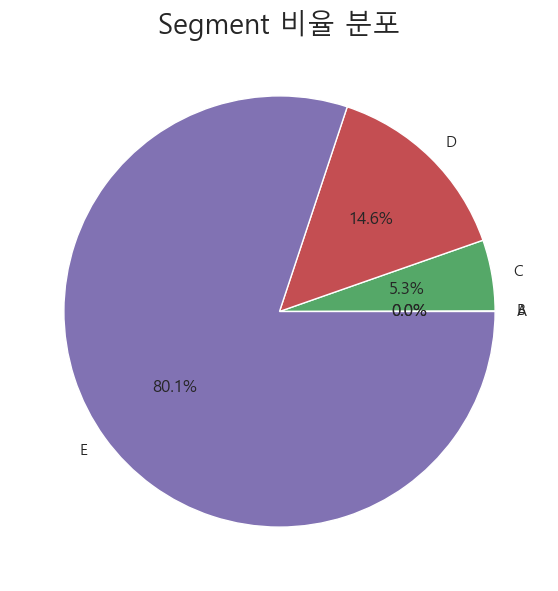

In [ ]:
# Segment의 갯수 시각화하여 확인
df = train_List[1][0].copy()
plt.figure(figsize=(7,7))

# 파이차트 그리기
plt.pie(df['Segment'].value_counts().sort_index(), labels=df['Segment'].value_counts().sort_index().index, autopct='%1.1f%%')
plt.title("Segment 비율 분포", fontsize=20)

plt.show()

## EDA : 필요없는 부분을 찾아보기

In [7]:
train_List[1][0].columns

Index(['기준년월', 'ID', '남녀구분코드', '연령', 'Segment', '회원여부_이용가능', '회원여부_이용가능_CA',
       '회원여부_이용가능_카드론', '소지여부_신용', '소지카드수_유효_신용', '소지카드수_이용가능_신용', '입회일자_신용',
       '입회경과개월수_신용', '회원여부_연체', '이용거절여부_카드론', '동의여부_한도증액안내', '수신거부여부_TM',
       '수신거부여부_DM', '수신거부여부_메일', '수신거부여부_SMS', '가입통신회사코드', '탈회횟수_누적',
       '최종탈회후경과월', '탈회횟수_발급6개월이내', '탈회횟수_발급1년이내', '거주시도명', '직장시도명', '마케팅동의여부',
       '유효카드수_신용체크', '유효카드수_신용', '유효카드수_신용_가족', '유효카드수_체크', '유효카드수_체크_가족',
       '이용가능카드수_신용체크', '이용가능카드수_신용', '이용가능카드수_신용_가족', '이용가능카드수_체크',
       '이용가능카드수_체크_가족', '이용카드수_신용체크', '이용카드수_신용', '이용카드수_신용_가족', '이용카드수_체크',
       '이용카드수_체크_가족', '이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_R3M_신용_가족',
       '이용금액_R3M_체크', '이용금액_R3M_체크_가족', '_1순위카드이용금액', '_1순위카드이용건수',
       '_1순위신용체크구분', '_2순위카드이용금액', '_2순위카드이용건수', '_2순위신용체크구분',
       '최종유효년월_신용_이용가능', '최종유효년월_신용_이용', '최종카드발급일자', '보유여부_해외겸용_본인',
       '이용가능여부_해외겸용_본인', '이용여부_3M_해외겸용_본인', '보유여부_해외겸용_신용_본인',
       '이용가능여부_해외겸용_신용_본인', '이용여부_3M_해외겸용_신용_본인', '연회비발생카드수_B0M',
 

- 뭔가 많은건 둘째치고, 확인해보면 이용가능카드수, 유효카드수, 이용금액 등 여러가지 요소가 겹치는걸 확인 가능하다. 이걸 AI 한테 물어봐서, 데이터 분석이 가능한지 물어보고 각 항몪에 대한 간략한 정보를 물어보면 다음과 같이 나온다.

### 너무 많다! 쳐내는 것이 좋겠다.
- 쳐내기 위한 조건
    1. 값이 각 행에 대해 고유한 값이거나, 모두 동일한 경우
    2. 상관관계가 낮은 경우
    3. Segment를 따지는데 불필요한 경우
    4. 너무 결측치가 많고, 딱히 중요치 않은 경우
- 시범용으로 데이터 프레임 하나만 불러와서 처리해보자

In [92]:
df = train_List[1][0].copy()

In [9]:
df.columns

Index(['기준년월', 'ID', '남녀구분코드', '연령', 'Segment', '회원여부_이용가능', '회원여부_이용가능_CA',
       '회원여부_이용가능_카드론', '소지여부_신용', '소지카드수_유효_신용', '소지카드수_이용가능_신용', '입회일자_신용',
       '입회경과개월수_신용', '회원여부_연체', '이용거절여부_카드론', '동의여부_한도증액안내', '수신거부여부_TM',
       '수신거부여부_DM', '수신거부여부_메일', '수신거부여부_SMS', '가입통신회사코드', '탈회횟수_누적',
       '최종탈회후경과월', '탈회횟수_발급6개월이내', '탈회횟수_발급1년이내', '거주시도명', '직장시도명', '마케팅동의여부',
       '유효카드수_신용체크', '유효카드수_신용', '유효카드수_신용_가족', '유효카드수_체크', '유효카드수_체크_가족',
       '이용가능카드수_신용체크', '이용가능카드수_신용', '이용가능카드수_신용_가족', '이용가능카드수_체크',
       '이용가능카드수_체크_가족', '이용카드수_신용체크', '이용카드수_신용', '이용카드수_신용_가족', '이용카드수_체크',
       '이용카드수_체크_가족', '이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_R3M_신용_가족',
       '이용금액_R3M_체크', '이용금액_R3M_체크_가족', '_1순위카드이용금액', '_1순위카드이용건수',
       '_1순위신용체크구분', '_2순위카드이용금액', '_2순위카드이용건수', '_2순위신용체크구분',
       '최종유효년월_신용_이용가능', '최종유효년월_신용_이용', '최종카드발급일자', '보유여부_해외겸용_본인',
       '이용가능여부_해외겸용_본인', '이용여부_3M_해외겸용_본인', '보유여부_해외겸용_신용_본인',
       '이용가능여부_해외겸용_신용_본인', '이용여부_3M_해외겸용_신용_본인', '연회비발생카드수_B0M',
 

### AI가 확인해본 각 칼럼의 정보 요소

#### 1. 고객 기본 정보 및 세그먼트

고객의 인구통계학적 특성과 마케팅을 위해 분류된 기초 정보입니다.

* **ID / 기준년월**: 고객 식별자와 데이터 생성 시점.
* **남녀구분코드 / 연령**: 기본적인 성별과 나이.
* **Segment / Life_Stage**: 소비 패턴이나 생애 주기(사회초년생, 육아기 등)에 따른 고객 분류.
* **거주시도명 / 직장시도명**: 주요 활동 지역 정보.

#### 2. 회원 상태 및 권한 (Status)

현재 이 고객이 카드를 정상적으로 쓸 수 있는 상태인지, 대출 서비스가 가능한지를 나타냅니다.

* **회원여부_이용가능 / 이용가능여부_...**: 현재 카드 사용 가능 여부.
* **회원여부_이용가능_CA / 카드론**: 현금서비스(CA) 및 카드론 이용 가능 여부.
* **회원여부_연체 / 이용거절여부_카드론**: 리스크 관리 지표 (연체 여부 및 대출 거절 여부).

#### 3. 카드 소지 및 발급 이력 (Inventory)

고객이 보유한 카드의 종류와 수량, 발급 시점에 관한 데이터입니다.

* **소지여부_신용 / 소지카드수_...**: 신용/체크카드 보유 현황.
* **유효 / 이용가능 / 이용**:
* **유효**: 유효기간이 남은 카드 수.
* **이용가능**: 분실/정지 등이 아닌 실제 사용 가능 카드 수.
* **이용**: 실제로 최근에 사용한 카드 수.


* **입회일자 / 최종발급일자 / 경과개월수**: 고객이 처음 가입한 날과 최근에 카드를 발급받은 시점(충성도 및 이탈 가능성 판단 지표).

#### 4. 마케팅 및 수신 동의 (Contactability)

고객에게 마케팅 활동을 할 수 있는지에 대한 정보입니다.

* **마케팅동의여부 / 동의여부_한도증액안내**: 전체적인 마케팅 참여 의사.
* **수신거부여부 (TM, DM, 메일, SMS)**: 채널별 마케팅 차단 현황 (이 데이터가 있어야 합법적인 캠페인이 가능합니다).
* **가입통신회사코드**: 제휴 마케팅이나 본인 인증 확인용.

#### 5. 카드 이용 실적 (Usage)

가장 핵심이 되는 데이터로, 고객이 얼마나 자주, 많이 쓰는지를 보여줍니다.

* **이용금액_R3M (신용/체크)**: 최근 3개월(Rolling 3 Month) 동안의 평균 또는 합계 이용 금액.
* **1순위 / 2순위 카드**: 고객이 주력으로 사용하는 카드와 보조 카드의 이용 금액 및 건수.
* **해외겸용 (보유/이용)**: 해외 결제 가능 여부와 최근 3개월 내 해외 사용 실적.

#### 6. 연회비 및 혜택 (Fee & Waiver)

수익성 분석에 사용되는 항목들입니다.

* **기본연회비 / 제휴연회비**: 발생한 연회비 총액.
* **할인금액 / 청구금액**: 감면된 금액을 제외하고 실제 고객이 납부한 금액.
* **면제카드수 (상품관련, 임직원, 우수회원, 기타)**: 연회비를 왜 면제해주었는지에 대한 사유별 분류.

#### 7. 해지 및 탈회 이력 (Churn)

고객이 이탈했거나 이탈할 가능성을 보여주는 지표입니다.

* **탈회횟수_누적 / 최종탈회후경과월**: 과거에 해지했던 경험.
* **탈회횟수_발급6개월/1년이내**: 이른바 '체리피커'나 서비스 불만족으로 인한 조기 이탈 여부.

In [ ]:
sns.countplot(data=df, x='남녀구분코드', hue = "Segment", hue_order = sorted(df['Segment'].unique()))

In [ ]:
train_List[1][0].info()

- 이렇게 보면 전체적인 nullcount를 볼 수 없으니, 다음과 같이 카운팅 하고 확인한다.

- 기준년월, ID는 고유하거나 모두 같은 코드니까 제거한다.
- 남녀구분코드나 연령이 Segment에 영향을 끼치는지 확인하기 위해, 시각화하여 확인한다.

In [ ]:
df["Segment_Temp"] = df['Segment'].map({'A':1, 'B':2, 'C':3, 'D':4, 'E':5})
display(df[["Segment_Temp","남녀구분코드"]].corr())
df.drop(columns=["Segment_Temp"], inplace=True)

### A와 B의 학습데이터가 너무 적으므로, 다른 기준년월의 데이터로 추가학습이 필요해보인다. Segment가 달마다 바뀌지 않음을 확인했으므로, Segment의 교육자료를 보충해도 괜찮을 것으로 보인다.

In [10]:
df["Segment"].value_counts()

Segment
E    320342
D     58207
C     21265
A       162
B        24
Name: count, dtype: int64

-  성별로 Segment가 구분되는것처럽 보이진 않는다. 그럼 corr은 어떨까?

- 상관관계가 없는것을 확인 가능하다.

### 연령 확인

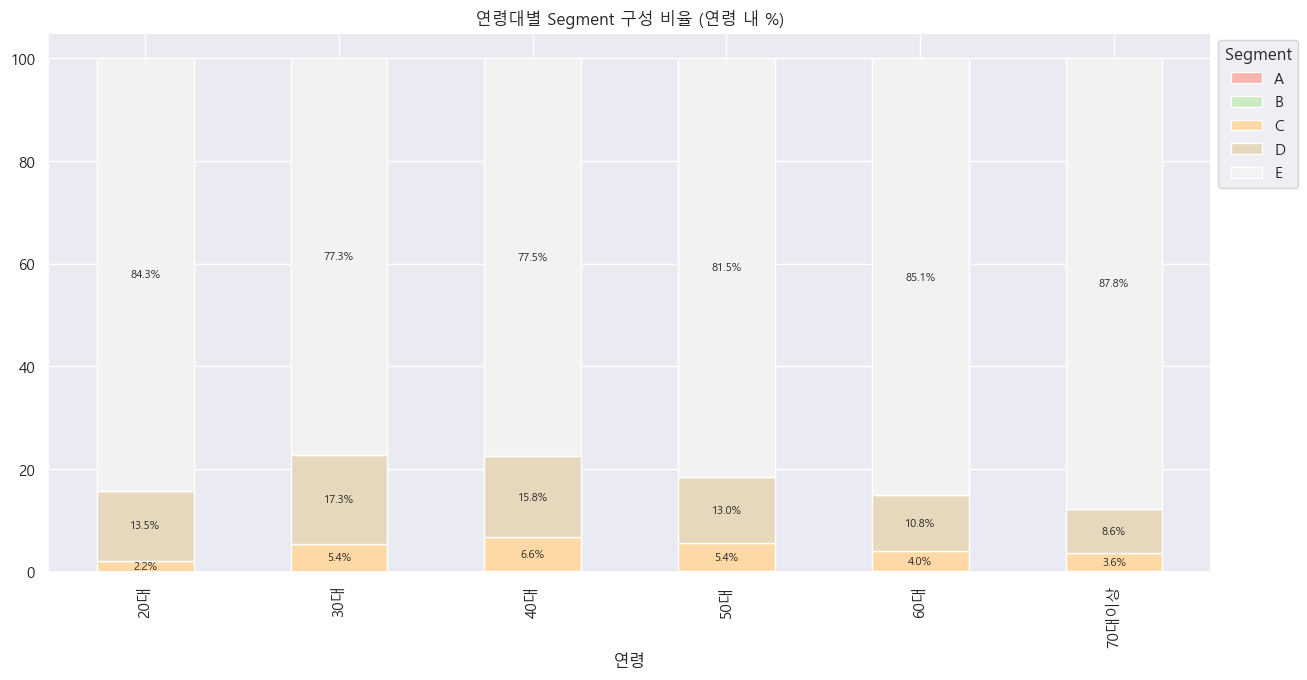

In [19]:
# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus": False},
        style='darkgrid')

# 1. 연령별/세그먼트별 비율 데이터 생성 (normalize=True가 핵심)
cross_tab = pd.crosstab(df['연령'], df['Segment'], normalize='index') * 100

# 2. 누적 막대 그래프 그리기
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='Pastel1')

# 3. 막대 중앙에 퍼센트 텍스트 넣기
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 2: # 너무 작은 비율은 글자가 겹치므로 생략
        x, y = p.get_xy() 
        ax.annotate(f'{height:.1f}%', 
                    (x + width/2, y + height/2), 
                    ha='center', va='center', fontsize=8)

plt.legend(title='Segment', bbox_to_anchor=(1, 1))
plt.title("연령대별 Segment 구성 비율 (연령 내 %)")
plt.show()

In [20]:
df["Segment_Temp"] = df['Segment'].map({'A':1, 'B':2, 'C':3, 'D':4, 'E':5})
df["연령_Temp"] = df['연령'].map({'20대':20, '30대':30, '40대':40, '50대':50, '60대':60, '70대' : 70})
display(df[["Segment_Temp","연령_Temp"]].corr())
df.drop(columns=["Segment_Temp"], inplace=True)
df.drop(columns=["연령_Temp"], inplace=True)

,Segment_Temp,연령_Temp
Segment_Temp,1.000000,0.018736
연령_Temp,0.018736,1.000000


- 딱히 연령이나 성별이 중요하지 않음을 보여준다.

### 문자열이 있는 데이터만 뽑아서 확인해보기

- 문자열이 있는 데이터만 뽑아서 보는건 어떨까?

In [34]:
# 모든 컬럼에서 데이터 타입이 문자열인 컬럼을 찾기
df_String = df.select_dtypes(include=['object']).drop(columns=['ID',"연령"])
df_String

,Segment,가입통신회사코드,거주시도명,직장시도명,_1순위신용체크구분,_2순위신용체크구분,연회비발생카드수_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,Life_Stage
0,D,L사,서울,서울,신용,체크,0개,0개,0개,0개,0개,자녀성장(2)
1,E,K사,경기,경기,신용,None,0개,0개,0개,0개,0개,자녀성장(1)
2,C,S사,서울,서울,신용,체크,0개,0개,0개,0개,0개,자녀출산기
3,D,L사,부산,부산,신용,체크,0개,0개,0개,0개,0개,자녀성장(2)
4,E,K사,광주,광주,신용,체크,0개,0개,0개,0개,0개,자녀성장(1)
...,...,...,...,...,...,...,...,...,...,...,...,...
399995,E,S사,인천,인천,신용,체크,0개,0개,0개,0개,0개,노년생활
399996,D,L사,인천,인천,신용,None,0개,0개,0개,0개,0개,자녀성장(2)
399997,C,S사,서울,서울,신용,None,0개,0개,0개,0개,0개,자녀출산기
399998,E,None,부산,부산,신용,None,0개,0개,0개,0개,0개,자녀성장(1)


#### 상관관계가 있는지 없는지 분석하기 위해서 그냥 인코딩 해버리고 바로 상관관계를 알아보자

In [47]:
df_String["연회비발생카드수_B0M"].unique()

array(['0개', '1개이상'], dtype=object)

In [68]:
# 1. 문자열 데이터를 숫자로 강제 변환 (가장 확실하고 빠른 방법)
df_encoded = df.astype(str).apply(lambda x: pd.factorize(x)[0])

# 2. 상관관계 계산
corr_matrix = df_encoded.corr()

# 3. 결과 출력
display(corr_matrix)

,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
기준년월,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID,NaN,1.000000,0.000116,0.001255,-0.001341,0.000810,0.001332,-0.002969,-0.001089,-0.000307,...,NaN,0.001716,-0.000274,NaN,NaN,NaN,NaN,0.002281,0.000168,-0.000334
남녀구분코드,NaN,0.000116,1.000000,-0.017216,-0.006626,0.013901,0.004410,0.012255,-0.006070,0.086378,...,NaN,0.008252,0.022982,NaN,NaN,NaN,NaN,-0.021942,-0.012299,0.009336
연령,NaN,0.001255,-0.017216,1.000000,0.029351,0.010572,-0.010098,0.050773,0.000446,-0.062817,...,NaN,-0.004287,-0.015092,NaN,NaN,NaN,NaN,-0.016707,0.214825,0.010232
Segment,NaN,-0.001341,-0.006626,0.029351,1.000000,0.032480,0.032465,0.002598,0.015391,-0.030730,...,NaN,-0.002928,-0.007976,NaN,NaN,NaN,NaN,0.030913,-0.004823,-0.000987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
우수회원면제카드수_B0M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
기타면제카드수_B0M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
카드신청건수,NaN,0.002281,-0.021942,-0.016707,0.030913,-0.053548,-0.065589,-0.023829,-0.008971,0.037461,...,NaN,0.118394,-0.007624,NaN,NaN,NaN,NaN,1.000000,0.020627,-0.080369
Life_Stage,NaN,0.000168,-0.012299,0.214825,-0.004823,-0.003602,-0.000118,-0.003975,0.005943,-0.049662,...,NaN,0.006365,0.002673,NaN,NaN,NaN,NaN,0.020627,1.000000,-0.006828


In [83]:
# 1. 분석하고 싶은 특정 컬럼명 설정 (예: 'target_column')
target_col = 'Segment' 

# 2. 해당 컬럼과 나머지 컬럼 간의 상관관계 추출
# 절댓값을 씌워 관계의 세기(강도)만 보거나, 그냥 두어 정/부의 관계를 확인하세요.
target_corr = corr_matrix[target_col].sort_values(ascending=False)

# 3. 결과 출력 (자기 자신 제외)
print(f"[{target_col}] 컬럼과 다른 컬럼 간의 상관관계 순위:")
print(target_corr.drop(target_col))

[Segment] 컬럼과 다른 컬럼 간의 상관관계 순위:
회원여부_이용가능         0.032480
회원여부_이용가능_CA      0.032465
카드신청건수            0.030913
연령                0.029351
최종탈회후경과월          0.022264
                    ...   
할인금액_제휴연회비_B0M         NaN
상품관련면제카드수_B0M          NaN
임직원면제카드수_B0M           NaN
우수회원면제카드수_B0M          NaN
기타면제카드수_B0M            NaN
Name: Segment, Length: 77, dtype: float64


In [143]:
def corr_maker(df, filename= False):
    mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
    # 1. 데이터 복사 (원본 데이터프레임 보호)
    temp_df = df.copy()
    temp_df["Segment"] = temp_df["Segment"].map(mapping)
    # 2. 문자열 컬럼만 골라내기
    obj_cols = temp_df.select_dtypes(include=['object']).columns

    # 3. 문자열 컬럼만 factorize 적용
    for col in obj_cols:
        temp_df[col] = pd.factorize(temp_df[col])[0]

    # 4. 전체 상관관계 계산 (스피어먼 방식)
    corr_matrix = temp_df.corr()# method = spearman

    # 5. 특정 컬럼('Segment') 기준 추출
    target_col = 'Segment'
    if target_col in corr_matrix.columns:
        target_corr = corr_matrix[target_col].sort_values(ascending=False)
        result_series = target_corr.drop(target_col)
        
        # --- [추가된 부분: 파일 저장] ---
        if filename:
            with open(filename, 'w', encoding='utf-8') as f:
                f.write(f"[{target_col}] 기준 상관관계 순위 (Spearman):\n")
                f.write("-" * 50 + "\n")
                f.write(result_series.to_string())
                f.write("\n" + "-" * 50)
                print(f"결과가 {filename}에 저장되었습니다.")
        print(result_series)
        # -------------------------------
    else:
        print(f"'{target_col}' 컬럼이 데이터에 없습니다.")

- 현재 상관관계를 따져봤을 때, 그다지 높은 상관관계를 띄는 컬럼은 없어보인다.

- 가입통신회사나 살고있는 혹은 직장의 지역이 영향을 끼치지는 마케팅에 큰 영향을 끼치진 않을것 같으니 제외한다.

### 연관성이 있는 함수들끼리 합쳐서 확인해보기

In [21]:
#연관 있어 보이는것 끼리 분리하는 함수
#param1에 같은 문자열을 사용하는지 확인하기 위한 문자열을 넣어 그 column 으로 새로운 데이터 프레임을 만들어줌
def find_R(df, param1):
    columns = list(df.columns)
    new_columns = []
    for column in columns:
        if param1 in column:
            new_columns.append(column)
    return pd.DataFrame(df[new_columns])

In [ ]:
df.columns

Index(['증감율_이용건수_신용_전월', '증감율_이용건수_신판_전월', '증감율_이용건수_일시불_전월', '증감율_이용건수_할부_전월',
       '증감율_이용건수_CA_전월', '증감율_이용건수_체크_전월', '증감율_이용건수_카드론_전월', '증감율_이용금액_신용_전월',
       '증감율_이용금액_신판_전월', '증감율_이용금액_일시불_전월', '증감율_이용금액_할부_전월', '증감율_이용금액_CA_전월',
       '증감율_이용금액_체크_전월', '증감율_이용금액_카드론_전월', '증감율_이용건수_신용_분기', '증감율_이용건수_신판_분기',
       '증감율_이용건수_일시불_분기', '증감율_이용건수_할부_분기', '증감율_이용건수_CA_분기', '증감율_이용건수_체크_분기',
       '증감율_이용건수_카드론_분기', '증감율_이용금액_신용_분기', '증감율_이용금액_신판_분기',
       '증감율_이용금액_일시불_분기', '증감율_이용금액_할부_분기', '증감율_이용금액_CA_분기', '증감율_이용금액_체크_분기',
       '증감율_이용금액_카드론_분기', '잔액_신판평균한도소진율_r6m', '잔액_신판최대한도소진율_r6m',
       '잔액_신판평균한도소진율_r3m', '잔액_신판최대한도소진율_r3m', '잔액_신판ca평균한도소진율_r6m',
       '잔액_신판ca최대한도소진율_r6m', '잔액_신판ca평균한도소진율_r3m', '잔액_신판ca최대한도소진율_r3m',
       '변동률_일시불평잔', '변동률_RV일시불평잔', '변동률_할부평잔', '변동률_CA평잔', '변동률_RVCA평잔',
       '변동률_카드론평잔', '변동률_잔액_B1M', '변동률_잔액_일시불_B1M', '변동률_잔액_CA_B1M',
       '혜택수혜율_R3M', '혜택수혜율_B0M', 'Segment'],
      dtype='str')

In [67]:
display(find_R(df, "카드수_B0M").value_counts())

연회비발생카드수_B0M  연회비할인카드수_B0M  상품관련면제카드수_B0M  임직원면제카드수_B0M  우수회원면제카드수_B0M  기타면제카드수_B0M
0개            0             0개             0개            0개             0개             395337
1개이상          0             0개             0개            0개             0개               4663
Name: count, dtype: int64

In [25]:
train_List[1][0].isnull().sum().sort_values(ascending = False).head(8)

_2순위신용체크구분        157866
최종유효년월_신용_이용       79318
가입통신회사코드           67364
직장시도명              40807
최종유효년월_신용_이용가능     32828
최종카드발급일자            3007
_1순위신용체크구분          2147
회원여부_이용가능_CA           0
dtype: int64

In [89]:
df = train_List[2][0].copy().drop(columns = ["기준년월","ID"])
df["Segment"] = train_List[1][0]["Segment"]
df.head()

,최초한도금액,카드이용한도금액,CA한도금액,일시상환론한도금액,월상환론한도금액,CA이자율_할인전,CL이자율_할인전,RV일시불이자율_할인전,RV현금서비스이자율_할인전,RV신청일자,...,한도심사요청건수,한도요청거절건수,한도심사요청후경과월,한도심사거절후경과월,시장단기연체여부_R6M,시장단기연체여부_R3M,시장연체상환여부_R6M,시장연체상환여부_R3M,rv최초시작후경과일,Segment
0,0,19354,7270,0,0,22.995207,18.254978,17.264967,21.234252,NaN,...,0회,0,3,3,0,0,0,0,99999999,D
1,0,9996,5718,41996,90611,14.793821,14.834873,10.622446,13.636594,20171009.0,...,0회,0,3,3,0,0,0,0,322,E
2,0,88193,35207,0,0,22.014276,17.875321,17.155829,21.226879,20120117.0,...,0회,0,3,3,0,0,0,0,2378,C
3,0,19062,6531,0,0,22.998014,22.999453,19.293674,22.999954,NaN,...,0회,0,3,3,0,0,0,0,99999999,D
4,0,177222,47149,48000,155020,14.661948,10.897410,10.654587,10.504785,NaN,...,0회,0,3,3,0,0,0,0,99999999,E


In [ ]:
# 1. 문자열 데이터를 숫자로 강제 변환 (가장 확실하고 빠른 방법)
df_encoded = df.astype(str).apply(lambda x: pd.factorize(x)[0])

# 2. 상관관계 계산
corr_matrix = df_encoded.corr()

# 3. 결과 출력
display(corr_matrix)

# 1. 분석하고 싶은 특정 컬럼명 설정 (예: 'target_column')
target_col = 'Segment' 

# 2. 해당 컬럼과 나머지 컬럼 간의 상관관계 추출
# 절댓값을 씌워 관계의 세기(강도)만 보거나, 그냥 두어 정/부의 관계를 확인하세요.
target_corr = corr_matrix[target_col].sort_values(ascending=False)

# 3. 결과 출력 (자기 자신 제외)
print(f"[{target_col}] 컬럼과 다른 컬럼 간의 상관관계 순위:")
print(target_corr.drop(target_col))

8
{1: ['201807_test_회원정보.parquet', '201808_test_회원정보.parquet', '201809_test_회원정보.parquet', '201810_test_회원정보.parquet', '201811_test_회원정보.parquet', '201812_test_회원정보.parquet'], 2: ['201807_test_신용정보.parquet', '201808_test_신용정보.parquet', '201809_test_신용정보.parquet', '201810_test_신용정보.parquet', '201811_test_신용정보.parquet', '201812_test_신용정보.parquet'], 3: ['201807_test_승인매출정보.parquet', '201808_test_승인매출정보.parquet', '201809_test_승인매출정보.parquet', '201810_test_승인매출정보.parquet', '201811_test_승인매출정보.parquet', '201812_test_승인매출정보.parquet'], 4: ['201807_test_청구정보.parquet', '201808_test_청구정보.parquet', '201809_test_청구정보.parquet', '201810_test_청구정보.parquet', '201811_test_청구정보.parquet', '201812_test_청구정보.parquet'], 5: ['201807_test_잔액정보.parquet', '201808_test_잔액정보.parquet', '201809_test_잔액정보.parquet', '201810_test_잔액정보.parquet', '201811_test_잔액정보.parquet', '201812_test_잔액정보.parquet'], 6: ['201807_test_채널정보.parquet', '201808_test_채널정보.parquet', '201809_test_채널정보.parquet', '201810_test_채널정보.parquet', '201

In [90]:

obj_cols = df.select_dtypes(include=['object']).columns

# 3. 문자열 컬럼만 factorize 적용 (숫자 컬럼은 건드리지 않음)
# 결측치는 -1로 처리하여 에러를 방지합니다.
for col in obj_cols:
    df[col] = pd.factorize(df[col])[0]

# 4. 전체 상관관계 계산 (이제 숫자와 인코딩된 문자열이 공존함)
corr_matrix = df.corr()

# 5. 특정 컬럼(예: 'Segment') 기준 상관관계 출력
target_col = 'Segment'
if target_col in corr_matrix.columns:
    target_corr = corr_matrix[target_col].sort_values(ascending=False)
    print(f"[{target_col}] 기준 상관관계 순위 (수치 데이터 유지):")
    print(target_corr.drop(target_col))
else:
    print(f"'{target_col}' 컬럼이 데이터에 없습니다. 컬럼명을 확인하세요.")

[Segment] 기준 상관관계 순위 (수치 데이터 유지):
rv최초시작후경과일        0.048864
한도증액후경과월          0.030499
강제한도감액금액_R12M     0.027672
RV신청일자            0.013858
강제한도감액횟수_R12M     0.013452
최초한도금액            0.006148
RV최소결제비율          0.005338
카드이용한도금액_B1M      0.003096
한도심사요청건수          0.002755
특별한도보유여부_R3M      0.002319
한도요청거절건수          0.001761
카드이용한도금액          0.001759
시장단기연체여부_R3M      0.000931
카드이용한도금액_B2M      0.000872
시장단기연체여부_R6M      0.000548
시장연체상환여부_R6M      0.000329
자발한도감액횟수_R12M    -0.001307
한도심사요청후경과월       -0.001665
자발한도감액금액_R12M    -0.001974
한도심사거절후경과월       -0.002137
자발한도감액후경과월       -0.002651
일시상환론한도금액        -0.004735
CL이자율_할인전        -0.005414
RV전환가능여부         -0.006333
CA한도금액           -0.007139
카드론동의여부          -0.008374
CA이자율_할인전        -0.009039
일시불ONLY전환가능여부    -0.011635
월상환론한도금액         -0.016375
월상환론상향가능한도금액     -0.016759
연체감액여부_R3M       -0.016983
RV일시불이자율_할인전     -0.019024
RV현금서비스이자율_할인전   -0.020447
강제한도감액후경과월       -0.020592
상향가능CA한도금액       -0.030431
한도증액금액_R12M      -0.0

In [ ]:
df = train_List[1][0].copy().drop(columns = ["기준년월","ID"])
df["Segment"] = train_List[1][0]["Segment"]
corr_maker(df, "1.corr.txt") 

결과가 1.corr.txt에 저장되었습니다.
입회일자_신용           0.268670
최종유효년월_신용_이용      0.080660
카드신청건수            0.071512
탈회횟수_누적           0.062752
연령                0.062301
                    ...   
할인금액_제휴연회비_B0M         NaN
상품관련면제카드수_B0M          NaN
임직원면제카드수_B0M           NaN
우수회원면제카드수_B0M          NaN
기타면제카드수_B0M            NaN
Name: Segment, Length: 75, dtype: float64


In [144]:
df = train_List[1][0].copy().drop(columns = ["기준년월","ID"])
df["Segment"] = train_List[1][0]["Segment"]
corr_maker(df, "1.corr.common.txt") 

결과가 1.corr.common.txt에 저장되었습니다.
입회일자_신용           0.252289
카드신청건수            0.066474
탈회횟수_누적           0.066329
최종유효년월_신용_이용      0.061464
남녀구분코드            0.060323
                    ...   
할인금액_제휴연회비_B0M         NaN
상품관련면제카드수_B0M          NaN
임직원면제카드수_B0M           NaN
우수회원면제카드수_B0M          NaN
기타면제카드수_B0M            NaN
Name: Segment, Length: 75, dtype: float64


In [135]:
df = train_List[2][0].copy().drop(columns = ["기준년월","ID"])
df["Segment"] = train_List[1][0]["Segment"]
corr_maker(df, "2.corr.txt") 

결과가 2.corr.txt에 저장되었습니다.
RV신청일자            0.079558
rv최초시작후경과일        0.073252
한도증액후경과월          0.058364
카드론동의여부           0.033120
RV전환가능여부          0.024188
강제한도감액금액_R12M     0.018131
강제한도감액횟수_R12M     0.013366
월상환론상향가능한도금액      0.011681
일시불ONLY전환가능여부     0.010944
RV최소결제비율          0.008431
특별한도보유여부_R3M      0.006949
한도심사거절후경과월        0.004054
시장단기연체여부_R6M      0.002450
시장단기연체여부_R3M      0.002219
한도심사요청후경과월        0.002210
자발한도감액후경과월        0.001246
시장연체상환여부_R6M      0.000785
한도심사요청건수         -0.004270
한도요청거절건수         -0.004617
상향가능CA한도금액       -0.009619
CL이자율_할인전        -0.011879
자발한도감액횟수_R12M    -0.012142
자발한도감액금액_R12M    -0.013542
상향가능한도금액         -0.014876
연체감액여부_R3M       -0.018573
강제한도감액후경과월       -0.022533
CA이자율_할인전        -0.032857
일시상환론한도금액        -0.055650
RV일시불이자율_할인전     -0.061364
한도증액횟수_R12M      -0.068405
한도증액금액_R12M      -0.071173
RV약정청구율          -0.074829
RV현금서비스이자율_할인전   -0.075565
월상환론한도금액         -0.086491
최초한도금액           -0.099281
CA한도금액           -0.270547
카드이

In [138]:
df = train_List[3][0].copy().drop(columns = ["기준년월","ID"])
df["Segment"] = train_List[1][0]["Segment"]
corr_maker(df, "3.corr.txt") 

결과가 3.corr.txt에 저장되었습니다.
이용금액대              0.358088
이용후경과월_할부_무이자      0.246007
이용후경과월_할부          0.242618
이용후경과월_CA          0.233502
이용후경과월_신용          0.193195
                     ...   
이용금액_당사기타_B0M           NaN
이용건수_당사페이_B0M           NaN
이용건수_당사기타_B0M           NaN
승인거절건수_입력오류_B0M         NaN
승인거절건수_기타_B0M           NaN
Name: Segment, Length: 404, dtype: float64


In [133]:
df = train_List[4][0].copy().drop(columns = ["기준년월","ID"])
df["Segment"] = train_List[1][0]["Segment"]
corr_maker(df, "4.corr.txt")

결과가 4.corr.txt에 저장되었습니다.
대표청구지고객주소구분코드       0.078771
포인트_잔여포인트_B0M       0.005353
대표결제일               0.003222
연체건수_R3M           -0.056389
연체건수_R6M           -0.060248
할인건수_B0M           -0.074353
대표청구서수령지구분코드       -0.079830
청구서수령방법            -0.079834
포인트_포인트_건별_R3M     -0.096659
포인트_포인트_건별_B0M     -0.106629
할인금액_B0M           -0.124447
포인트_포인트_월적립_B0M    -0.125937
포인트_포인트_월적립_R3M    -0.128849
할인금액_청구서_B0M       -0.138778
포인트_적립포인트_R12M     -0.142163
청구서발송여부_R6M        -0.144162
선결제건수_R3M          -0.147344
포인트_마일리지_월적립_B0M   -0.149700
상환개월수_결제일_R3M      -0.150595
할인금액_R3M           -0.155004
포인트_마일리지_월적립_R3M   -0.156722
포인트_적립포인트_R3M      -0.157815
마일_잔여포인트_B0M       -0.159611
청구서발송여부_R3M        -0.160210
선결제건수_R6M          -0.168006
상환개월수_결제일_R6M      -0.174219
마일_적립포인트_R12M      -0.175654
마일_이용포인트_R12M      -0.178482
마일_이용포인트_R3M       -0.182200
포인트_마일리지_건별_R3M    -0.182444
포인트_마일리지_건별_B0M    -0.184488
할인금액_청구서_R3M       -0.187083
포인트_이용포인트_R12M     -0.200462
포인트_이용포인트_R3M     

In [132]:
df = train_List[5][0].copy().drop(columns = ["기준년월","ID"])
df["Segment"] = train_List[1][0]["Segment"]
corr_maker(df, "5.corr.txt")

결과가 5.corr.txt에 저장되었습니다.
연체일자_B0M             0.031992
연체잔액_대환론_B0M         0.001569
매각잔액_B1M             0.000785
잔액_리볼빙CA이월_B0M       0.000510
연체원금_B1M            -0.000830
                       ...   
RV잔액이월횟수_R3M              NaN
연체잔액_일시불_해외_B0M           NaN
연체잔액_RV일시불_해외_B0M         NaN
연체잔액_할부_해외_B0M            NaN
연체잔액_CA_해외_B0M            NaN
Name: Segment, Length: 80, dtype: float64


In [131]:
df = train_List[6][0].copy().drop(columns = ["기준년월","ID"])
df["Segment"] = train_List[1][0]["Segment"]
corr_maker(df, "6.corr.txt")

결과가 6.corr.txt에 저장되었습니다.
방문후경과월_PC_R6M     0.183480
방문후경과월_앱_R6M      0.167339
인입후경과월_IB_R6M     0.153958
인입횟수_ARS_R6M      0.109145
이용메뉴건수_ARS_R6M    0.108798
                    ...   
불만제기건수_B0M             NaN
불만제기건수_R12M            NaN
당사PAY_방문횟수_B0M         NaN
당사PAY_방문횟수_R6M         NaN
당사PAY_방문월수_R6M         NaN
Name: Segment, Length: 103, dtype: float64


In [130]:
df = train_List[7][0].copy().drop(columns = ["기준년월","ID"])
df["Segment"] = train_List[1][0]["Segment"]
corr_maker(df, "7.corr.txt")

결과가 7.corr.txt에 저장되었습니다.
컨택건수_이용유도_TM_R6M     0.165664
컨택건수_이용유도_인터넷_R6M    0.083312
컨택건수_신용발급_TM_R6M     0.064689
컨택건수_이용유도_TM_B0M     0.064251
컨택건수_이용유도_청구서_R6M    0.055000
                       ...   
컨택건수_CA_당사앱_R6M           NaN
컨택건수_리볼빙_당사앱_R6M          NaN
컨택건수_이용유도_당사앱_R6M         NaN
컨택건수_FDS_B0M              NaN
컨택건수_FDS_R6M              NaN
Name: Segment, Length: 62, dtype: float64


In [129]:
df = train_List[8][0].copy().drop(columns = ["기준년월","ID"])
df["Segment"] = train_List[1][0]["Segment"]
corr_maker(df, "8.corr.txt")

결과가 8.corr.txt에 저장되었습니다.
증감율_이용건수_할부_전월        0.118921
증감율_이용건수_체크_전월        0.114257
증감율_이용금액_할부_전월        0.093495
증감율_이용금액_체크_전월        0.090475
증감율_이용금액_CA_전월        0.080897
증감율_이용건수_CA_전월        0.079294
변동률_잔액_CA_B1M         0.057283
증감율_이용금액_신용_분기        0.046483
증감율_이용금액_신판_분기        0.042215
증감율_이용금액_일시불_분기       0.031413
증감율_이용금액_할부_분기        0.022960
증감율_이용금액_카드론_전월       0.016245
증감율_이용건수_카드론_전월       0.014339
증감율_이용건수_일시불_분기       0.009083
증감율_이용건수_신용_분기        0.008199
증감율_이용건수_신판_분기        0.007975
증감율_이용금액_체크_분기        0.007461
증감율_이용건수_카드론_분기       0.007369
증감율_이용금액_카드론_분기       0.007029
변동률_일시불평잔             0.006664
증감율_이용건수_신용_전월        0.002369
증감율_이용건수_신판_전월        0.000736
증감율_이용건수_일시불_전월      -0.002554
증감율_이용건수_체크_분기       -0.007022
증감율_이용금액_CA_분기       -0.019928
혜택수혜율_R3M            -0.020510
변동률_잔액_B1M           -0.023367
증감율_이용건수_할부_분기       -0.028278
변동률_잔액_일시불_B1M       -0.031200
변동률_카드론평잔            -0.031226
혜택수혜율_B0M            -0.033195
증감율_이용건수_CA_분기

In [150]:
df.select_dtypes(include=['float64']).columns
df["최종유효년월_신용_이용가능"]

0         202110.0
1         202112.0
2         202111.0
3         202201.0
4         202201.0
            ...   
399995    202009.0
399996    202110.0
399997    202109.0
399998    202112.0
399999    202206.0
Name: 최종유효년월_신용_이용가능, Length: 400000, dtype: float64

In [151]:
train_List[8][0]

,기준년월,ID,증감율_이용건수_신용_전월,증감율_이용건수_신판_전월,증감율_이용건수_일시불_전월,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용건수_카드론_전월,증감율_이용금액_신용_전월,...,변동률_RV일시불평잔,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M
0,201807,TRAIN_000000,0.454548,0.454548,0.364727,1.999996,0.0,0.000000,0.0,0.409766,...,0.999998,1.042805,0.999700,0.999998,0.999998,0.261886,0.270752,0.000000,1.044401,1.280543
1,201807,TRAIN_000001,-0.511808,-0.511808,-0.511808,0.000000,0.0,0.000000,0.0,-1.010817,...,1.092698,0.905663,0.999998,0.999998,0.999998,-0.563388,-0.670348,0.000000,0.000000,0.000000
2,201807,TRAIN_000002,-0.062716,-0.062716,0.067843,-1.999996,0.0,0.000000,0.0,-0.902166,...,1.006124,1.993590,0.852567,0.999998,0.999998,-0.046516,0.058114,-0.014191,0.524159,1.208420
3,201807,TRAIN_000003,0.135707,0.135707,0.153975,-1.999996,0.0,0.000000,0.0,-0.866052,...,0.999998,1.050646,0.999877,0.999998,0.999998,0.023821,0.258943,0.000000,0.880925,1.657124
4,201807,TRAIN_000004,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000028,...,0.999998,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,201807,TRAIN_399995,0.000000,0.000000,0.000000,0.000000,0.0,-0.338978,0.0,0.000060,...,0.999998,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN
399996,201807,TRAIN_399996,-0.234430,-0.234430,-0.234430,0.000000,0.0,0.000000,0.0,-0.949039,...,0.999998,0.000000,0.999998,0.999998,0.924698,-0.449567,-0.513523,0.000000,1.951215,1.770262
399997,201807,TRAIN_399997,0.432663,0.432663,0.370023,1.999996,0.0,0.000000,0.0,0.512670,...,0.999998,0.305713,0.999998,0.999998,0.999998,0.580665,0.601561,0.000000,0.000000,0.000000
399998,201807,TRAIN_399998,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,-0.000002,...,0.999998,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN
